## Final Project

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [1]:
import pandas as pd
import seaborn as sns

### 1. Data Loading and Understanding

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
boston_df = boston_df.drop('Unnamed: 0', axis=1)

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [14]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df['AGEGRP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 150], labels=['0-35', '36-70', '70+'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGEGRP
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,36-70
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70+
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,36-70
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,36-70
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,36-70


### 2. Descriptive Stats and Visualizations

Text(0.5, 1.0, 'Median Value of Owner Occupied Homes Distribution')

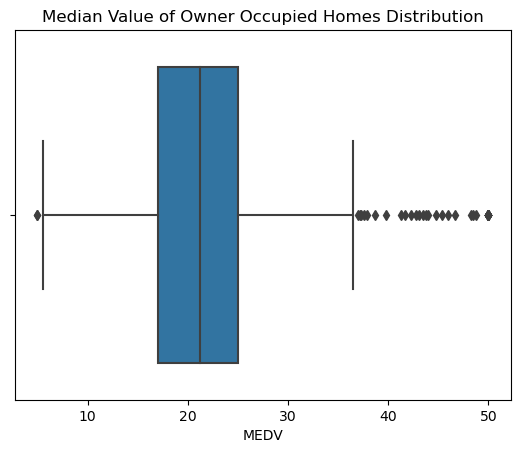

In [22]:
sns.boxplot(data=boston_df, x='MEDV').set_title('Median Value of Owner Occupied Homes Distribution')

Text(0.5, 1.0, 'River Bound Count')

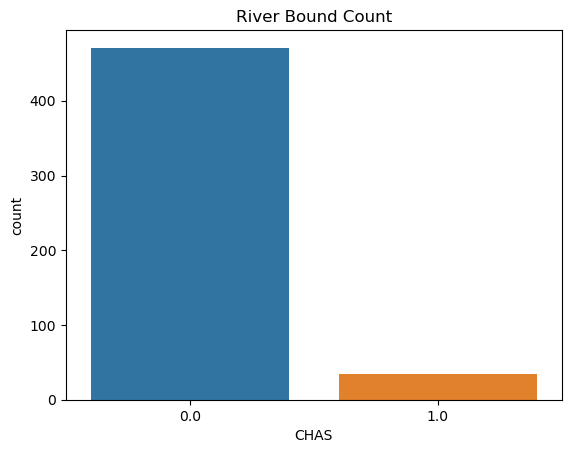

In [3]:
sns.countplot(x='CHAS', data=boston_df).set_title('River Bound Count')

Text(0.5, 1.0, 'Median Value of Owner Occupied Homes vs Age Group')

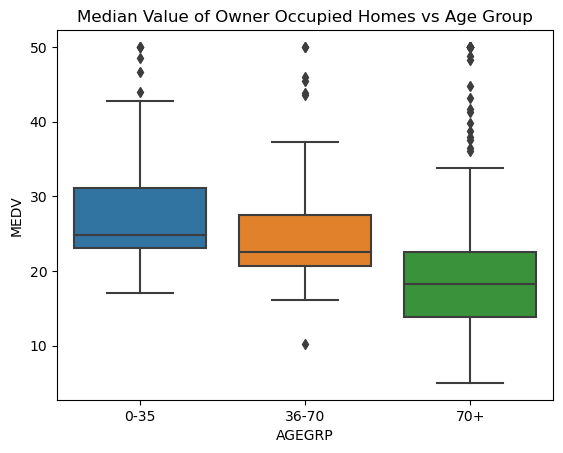

In [9]:
sns.boxplot(data=boston_df, y='MEDV', x='AGEGRP').set_title('Median Value of Owner Occupied Homes vs Age Group')

Text(0.5, 1.0, 'Nitric Oxide Concentration vs Non-retail business acres per town proportion')

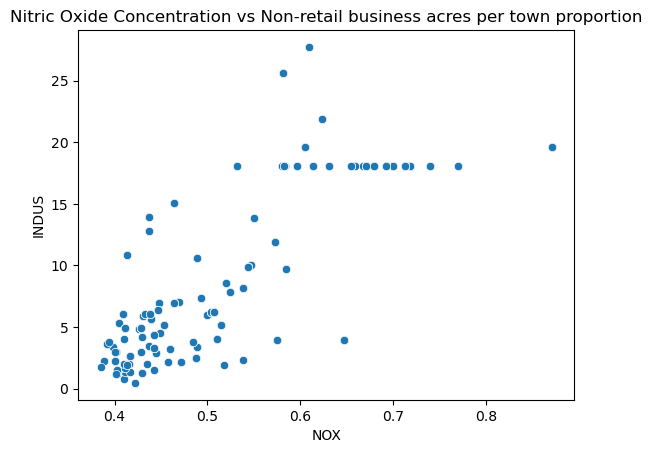

In [23]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS').set_title('Nitric Oxide Concentration vs Non-retail business acres per town proportion')

Text(0.5, 1.0, 'Pupil Teacher Ratio Distribution')

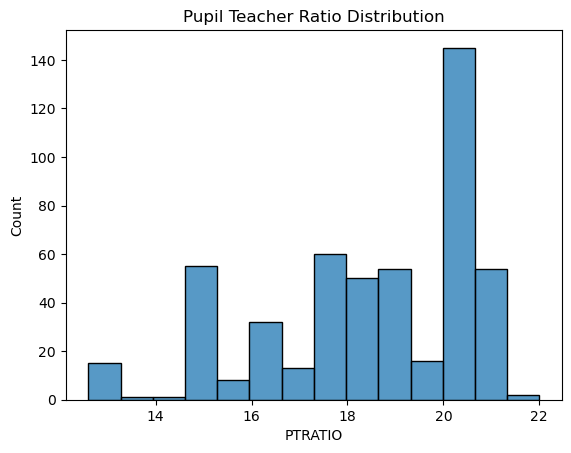

In [10]:
sns.histplot(data=boston_df, x='PTRATIO').set_title('Pupil Teacher Ratio Distribution')

### 3. Statistical Tests

In [11]:
from scipy import stats

#### **Test 1**

*- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)*

**H0** - There is no significant difference <br>
**Conclusion** - We reject the null hypothesis and conclude there is significant difference between groups

In [14]:
# Divide by Charles River Variable
sample1 = boston_df[boston_df['CHAS'] == 0]['MEDV']
sample2 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05


#### **Test 2**

*- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?*

**H0** - There is no significant difference <br>
**Conclusion** - We reject the null hypothesis and conclude there is significant difference between groups

In [16]:
# Divide by Age Variable
sample1 = boston_df[boston_df['AGEGRP'] == '0-35']['MEDV']
sample2 = boston_df[boston_df['AGEGRP'] == '36-70']['MEDV']
sample3 = boston_df[boston_df['AGEGRP'] == '70+']['MEDV']

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(sample1, sample2, sample3)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


#### **Test 3**

*- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?*

**H0** - There is no significant relationship <br>
**Conclusion** - We reject the null hypothesis and conclude there is a significant relationship

In [17]:
# Create two arrays with the variables
x = boston_df['NOX']
y = boston_df['INDUS']

# Perform the Pearson correlation
correlation_coefficient, p_value = stats.pearsonr(x, y)

# Print the results
print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)


Correlation coefficient: 0.7636514469209162
P-value: 7.913361061229697e-98


#### **Test 4**

*- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?*

**H0** - There is no significant impact on an additional wgt distance <br>
**Conclusion** - We reject the null hypothesis and conclude there is a significant impact
**Impact** - The impact of an additional weighted distance on the median value of owner occupied homes is <font color='green'>0.188</font>

In [19]:
import statsmodels.api as sm
import numpy as np

# Create the independent variable (X) and dependent variable (y)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant term to the independent variable array
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression coefficients and summary
print("Intercept:", results.params[0])
print("Coefficient:", results.params[1])
print(results.summary())


Intercept: 18.390088330493384
Coefficient: 1.0916130158411093
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        20:44:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

### Author
Daniel F. Cifuentes